In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import numpy as np
plt.rcParams.update({'font.size' : 13})

In [13]:
textrank = pd.read_csv('../data/textrank_fil.csv')
wordrank = pd.read_csv('../data/wordrank_fil.csv')
hybrid64 = pd.read_csv('../data/hybrid64_fil.csv')
hybrid80 = pd.read_csv('../data/hybrid80_fil.csv')

In [14]:
textrank_mean = textrank.mean()
wordrank_mean = wordrank.mean()
hybrid64_mean = hybrid64.mean()
hybrid80_mean = hybrid80.mean()

textrank_sd = textrank.std()
wordrank_sd = wordrank.std()
hybrid64_sd = hybrid64.std()
hybrid80_sd = hybrid80.std()

In [15]:
means = pd.concat([textrank_mean, wordrank_mean, hybrid64_mean, hybrid80_mean], axis = 1)
means = means.rename(columns={0: 'TextRank', 1 : 'WordRank', 2 : 'Hybrid64', 3:'Hybrid80'})

sds = pd.concat([textrank_sd, wordrank_sd, hybrid64_sd, hybrid80_sd], axis = 1)
sds = sds.rename(columns={0: 'TextRank', 1 : 'WordRank', 2 : 'Hybrid64', 3:'Hybrid80'})

sds = sds*1.96/np.sqrt(textrank.shape[0])

In [16]:
np.round(means, 1) 

,TextRank,WordRank,Hybrid64,Hybrid80
ROUGE_1,57.4,60.1,57.2,57.1
ROUGE_2,21.2,20.3,19.9,20.3
ROUGE_3,10.0,8.7,8.8,9.2
BLEU_1,27.0,20.8,26.7,26.8
BLEU_2,10.1,7.3,9.5,9.8
BLEU_3,5.0,3.5,4.4,4.7
F1_1,36.0,30.3,35.7,35.9
F1_2,13.4,10.4,12.6,12.9
F1_3,6.5,4.8,5.8,6.1


In [17]:
np.round(sds, 1) 

,TextRank,WordRank,Hybrid64,Hybrid80
ROUGE_1,4.7,4.1,4.1,4.3
ROUGE_2,4.9,4.6,4.4,4.7
ROUGE_3,3.7,3.2,3.3,3.5
BLEU_1,3.7,3.2,3.1,3.2
BLEU_2,2.7,2.2,2.3,2.5
BLEU_3,2.0,1.7,1.8,1.9
F1_1,3.7,3.6,3.2,3.3
F1_2,3.2,2.8,2.9,3.1
F1_3,2.5,2.0,2.2,2.4


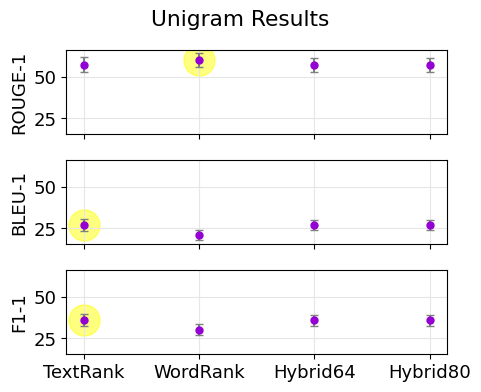

In [21]:
fig, axs = plt.subplots(3, sharex = True, figsize = (5, 4), sharey = True)

axs[0].errorbar(means.columns, means.iloc[0, :], sds.iloc[0, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-1')
axs[0].scatter('WordRank', means.iloc[0, 1], s = 500, alpha = 0.5, color = 'yellow')

axs[1].errorbar(means.columns, means.iloc[3, :], sds.iloc[3, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-1')
axs[1].scatter('TextRank', means.iloc[3, 0], s = 500, alpha = 0.5, color = 'yellow')

axs[2].errorbar(means.columns, means.iloc[6, :], sds.iloc[6, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[2].set(ylabel = 'F1-1')
axs[2].scatter('TextRank', means.iloc[6, 0], s = 500, alpha = 0.5, color = 'yellow')


for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Unigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)
plt.savefig("unigrams.pdf")
plt.show()

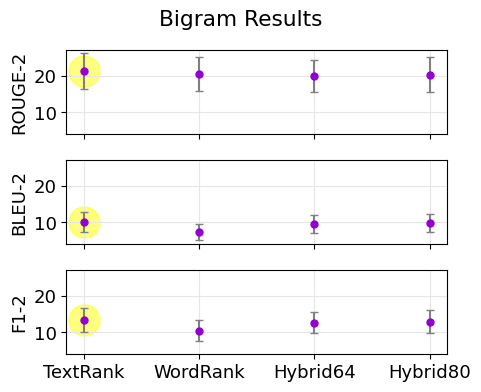

In [19]:
fig, axs = plt.subplots(3, sharex = True, figsize = (5, 4), sharey = True)

axs[0].errorbar(means.columns, means.iloc[1, :], sds.iloc[1, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-2')
axs[0].scatter('TextRank', means.iloc[1, 0], s = 500, alpha = 0.5, color = 'yellow')

axs[1].errorbar(means.columns, means.iloc[4, :], sds.iloc[4, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-2')
axs[1].scatter('TextRank', means.iloc[4, 0], s = 500, alpha = 0.5, color = 'yellow')

axs[2].errorbar(means.columns, means.iloc[7, :], sds.iloc[7, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[2].set(ylabel = 'F1-2')
axs[2].scatter('TextRank', means.iloc[7, 0], s = 500, alpha = 0.5, color = 'yellow')


for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Bigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)
plt.savefig("bigrams.pdf")
plt.show()

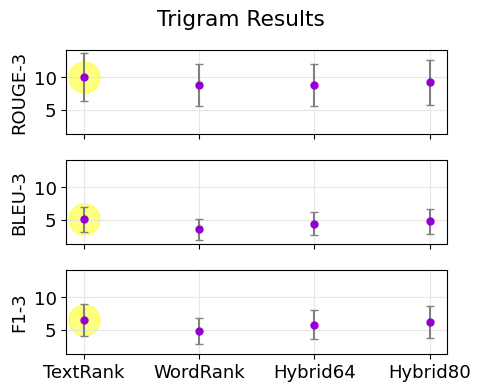

In [20]:
fig, axs = plt.subplots(3, sharex = True, figsize = (5, 4), sharey = True)

axs[0].errorbar(means.columns, means.iloc[2, :], sds.iloc[2, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-3')
axs[0].scatter('TextRank', means.iloc[2, 0], s = 500, alpha = 0.5, color = 'yellow')

axs[1].errorbar(means.columns, means.iloc[5, :], sds.iloc[5, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-3')
axs[1].scatter('TextRank', means.iloc[5, 0], s = 500, alpha = 0.5, color = 'yellow')

axs[2].errorbar(means.columns, means.iloc[8, :], sds.iloc[8, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 5, color = 'darkviolet');
axs[2].set(ylabel = 'F1-3')
axs[2].scatter('TextRank', means.iloc[8, 0], s = 500, alpha = 0.5, color = 'yellow')
for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Trigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)
plt.savefig("trigrams.pdf")
plt.show()